# Topic Modeling

## Introduction

Another popular text analysis technique is called topic modeling. The ultimate goal of topic modeling is to find various topics that are present in your corpus. Each document in the corpus will be made up of at least one topic, if not multiple topics.

In this notebook, we will be covering the steps on how to do **Latent Dirichlet Allocation (LDA)**, which is one of many topic modeling techniques. It was specifically designed for text data.

To use a topic modeling technique, you need to provide (1) a document-term matrix and (2) the number of topics you would like the algorithm to pick up.

Once the topic modeling technique is applied, your job as a human is to interpret the results and see if the mix of words in each topic make sense. If they don't make sense, you can try changing up the number of topics, the terms in the document-term matrix, model parameters, or even try a different model.

## Topic Modeling - Attempt #1 (All Text)

In [ ]:
# Let's read in our document-term matrix
import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop (1).pkl')
data

,aaaaah,aaah,aah,abandoned,abbott,abc,abcs,abilities,ability,abilityand,...,zip,zipup,zo,zombie,zombies,zone,zoning,zoo,zoom,éclair
adam,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
ali,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
chris,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dave,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ellen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
jack,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 72.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.

In [ ]:
!pip install gensim==4.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which

In [ ]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

,adam,ali,anthony,bill,chris,dave,ellen,jack,jim,joe,john,kevin,kyle,louis,mike,pete,ricky,sal,tig,vir
aaaaah,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aaah,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aah,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0
abandoned,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
abbott,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [ ]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop (1).pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes. Let's start the number of topics at 2, see if the results make sense, and increase the number from there.

In [ ]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.023*"like" + 0.013*"im" + 0.011*"just" + 0.011*"know" + 0.009*"dont" + 0.008*"fucking" + 0.006*"got" + 0.006*"youre" + 0.006*"thats" + 0.005*"gonna"'),
 (1,
  '0.029*"like" + 0.017*"im" + 0.016*"just" + 0.015*"know" + 0.014*"dont" + 0.010*"right" + 0.010*"thats" + 0.008*"got" + 0.008*"youre" + 0.008*"people"')]

In [ ]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.028*"like" + 0.014*"im" + 0.014*"know" + 0.014*"just" + 0.013*"dont" + 0.009*"people" + 0.009*"thats" + 0.007*"right" + 0.007*"youre" + 0.006*"think"'),
 (1,
  '0.033*"like" + 0.019*"im" + 0.017*"just" + 0.016*"know" + 0.012*"dont" + 0.010*"thats" + 0.008*"said" + 0.008*"youre" + 0.006*"people" + 0.006*"got"'),
 (2,
  '0.021*"like" + 0.016*"im" + 0.014*"dont" + 0.013*"just" + 0.013*"right" + 0.012*"know" + 0.010*"fucking" + 0.010*"got" + 0.009*"thats" + 0.008*"said"')]

In [ ]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.001*"like" + 0.001*"im" + 0.001*"just" + 0.001*"dont" + 0.001*"know" + 0.001*"right" + 0.000*"people" + 0.000*"gonna" + 0.000*"got" + 0.000*"said"'),
 (1,
  '0.006*"ok" + 0.005*"husband" + 0.004*"like" + 0.003*"pregnant" + 0.003*"doo" + 0.003*"just" + 0.002*"fingers" + 0.002*"wanna" + 0.002*"asian" + 0.002*"hpv"'),
 (2,
  '0.001*"like" + 0.001*"im" + 0.001*"dont" + 0.001*"know" + 0.001*"just" + 0.000*"right" + 0.000*"thats" + 0.000*"people" + 0.000*"got" + 0.000*"said"'),
 (3,
  '0.031*"like" + 0.019*"im" + 0.016*"just" + 0.016*"know" + 0.014*"dont" + 0.010*"thats" + 0.010*"right" + 0.008*"got" + 0.008*"youre" + 0.008*"said"')]

These topics aren't looking too great. We've tried modifying our parameters. Let's try modifying our terms list as well.

## Topic Modeling - Attempt #2 (Nouns Only)

One popular trick is to look only at terms that are from one part of speech (only nouns, only adjectives, etc.). Check out the UPenn tag set: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html.

In [ ]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(all_nouns)

In [ ]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean.pkl')

data_clean

,transcript
adam,back up back up♪ its gonna take a lotta love ♪...
ali,ladies and gentlemen please welcome to the sta...
anthony,thank you thank you thank you san francisco th...
bill,all right thank you thank you very much thank ...
chris,original air date october host chris rock doe...
dave,this is dave he tells dirty jokes for a living...
ellen,ellen degeneres for your approval is less a co...
jack,look jack jackjack can you sign this for me pl...
jim,ladies and gentlemen please welcome to the sta...
joe,ladies and gentlemen welcome joe roganwhat the...


In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
adam,gon lotta love ♪ ♪ night ♪yo guys shit im driv...
ali,ladies gentlemen stage wonghi thank hello na s...
anthony,thank thank people i em i francisco city world...
bill,thank thank pleasure georgia area oasis i june...
chris,air date october host chris rock trump pandemi...
dave,jokes living stare work profound train thought...
ellen,ellen degeneres approval comedy ego massage ho...
jack,jack jackjack – whoa whoaladies gentlemen stag...
jim,ladies gentlemen stage mr jim jefferies thank ...
joe,ladies gentlemen joe fck thanks phone fckface ...


In [ ]:
#data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names_out())


In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Define additional stop words
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

# Ensure data_nouns is defined and 'transcript' column exists
# Assuming data_nouns is created from a previous step
# Example:
# data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns), columns=['transcript'])

# Convert 'transcript' column to string type
data_nouns['transcript'] = data_nouns['transcript'].astype(str)

# Create document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names_out())
data_dtmn.index = data_nouns.index
data_dtmn


,aah,abc,abcs,abilities,ability,abilityand,abortion,abortions,aboutin,absurdity,...,zealand,zeppelin,zillion,zipup,zombie,zombies,zone,zoo,zoom,éclair
adam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
ali,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
anthony,0,0,0,0,0,0,2,0,0,0,...,10,0,0,0,0,0,0,0,0,0
bill,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
chris,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dave,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
ellen,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jack,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.010*"day" + 0.009*"man" + 0.009*"thing" + 0.007*"way" + 0.006*"things" + 0.006*"life" + 0.005*"house" + 0.005*"gon" + 0.005*"hes" + 0.005*"cause"'),
 (1,
  '0.010*"shit" + 0.009*"thing" + 0.008*"man" + 0.007*"guy" + 0.007*"hes" + 0.007*"gon" + 0.007*"life" + 0.006*"cause" + 0.006*"day" + 0.006*"fuck"')]

In [ ]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.007*"guy" + 0.007*"day" + 0.006*"thing" + 0.006*"way" + 0.006*"man" + 0.006*"thank" + 0.006*"gon" + 0.005*"life" + 0.005*"hes" + 0.005*"fuck"'),
 (1,
  '0.011*"man" + 0.010*"thing" + 0.009*"fck" + 0.009*"day" + 0.007*"gon" + 0.007*"kids" + 0.006*"house" + 0.006*"way" + 0.006*"shit" + 0.006*"things"'),
 (2,
  '0.011*"shit" + 0.010*"thing" + 0.009*"day" + 0.009*"man" + 0.008*"life" + 0.008*"hes" + 0.007*"guy" + 0.007*"lot" + 0.007*"fuck" + 0.006*"cause"')]

In [ ]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.011*"shit" + 0.011*"man" + 0.008*"fuck" + 0.008*"ahah" + 0.007*"guy" + 0.006*"lot" + 0.006*"hes" + 0.006*"friends" + 0.006*"way" + 0.006*"didnt"'),
 (1,
  '0.008*"shit" + 0.008*"gon" + 0.007*"lot" + 0.006*"cause" + 0.006*"day" + 0.006*"thing" + 0.006*"hes" + 0.005*"women" + 0.005*"man" + 0.005*"husband"'),
 (2,
  '0.009*"day" + 0.008*"guy" + 0.008*"thing" + 0.007*"cause" + 0.007*"way" + 0.007*"man" + 0.006*"gon" + 0.006*"hes" + 0.006*"fucking" + 0.006*"fuck"'),
 (3,
  '0.011*"thing" + 0.010*"man" + 0.009*"day" + 0.009*"life" + 0.007*"shit" + 0.007*"gon" + 0.007*"way" + 0.007*"hes" + 0.006*"fck" + 0.006*"kids"')]

## Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [ ]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(nouns_adj)

In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
adam,gon lotta love ♪ ♪ night ♪yo i guys shit im dr...
ali,ladies gentlemen welcome stage ali wonghi welc...
anthony,thank san francisco thank good people surprise...
bill,right thank thank pleasure greater atlanta geo...
chris,original air date october host chris rock dona...
dave,dirty jokes living stare most hard work profou...
ellen,ellen degeneres approval comedy special hourlo...
jack,jack jackjack pleasejack– – whoa whoa whoaladi...
jim,ladies gentlemen welcome stage mr jim jefferie...
joe,ladies gentlemen joe fck san francisco thanks ...


In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Define additional stop words
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said','aaaaah','aah']
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

# Ensure data_nouns_adj is defined and 'transcript' column exists
# Assuming data_nouns_adj is created from a previous step
# Example:
# data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj), columns=['transcript'])

# Convert 'transcript' column to string type
data_nouns_adj['transcript'] = data_nouns_adj['transcript'].astype(str)

# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=0.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names_out())
data_dtmna.index = data_nouns_adj.index
data_dtmna


,abandoned,abc,abcs,abilities,ability,abilityand,abject,able,ablebodied,abortion,...,zealand,zeppelin,zillion,zipup,zombie,zombies,zone,zoo,zoom,éclair
adam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
ali,0,1,0,0,0,0,0,2,0,0,...,0,0,0,0,1,0,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,2,...,10,0,0,0,0,0,0,0,0,0
bill,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0
chris,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ellen,0,0,0,0,1,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
jack,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,2,0,0,0
jim,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.004*"shit" + 0.003*"mom" + 0.003*"gon" + 0.003*"kid" + 0.002*"dad" + 0.002*"fuck" + 0.002*"joke" + 0.002*"kids" + 0.002*"school" + 0.002*"children"'),
 (1,
  '0.011*"shit" + 0.008*"gon" + 0.006*"fuck" + 0.006*"kids" + 0.005*"fucking" + 0.005*"fck" + 0.004*"women" + 0.004*"dick" + 0.004*"everybody" + 0.003*"kid"')]

In [ ]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.012*"shit" + 0.009*"fuck" + 0.006*"fucking" + 0.005*"gon" + 0.004*"dude" + 0.004*"women" + 0.004*"kid" + 0.004*"black" + 0.004*"son" + 0.003*"everybody"'),
 (1,
  '0.009*"shit" + 0.008*"gon" + 0.006*"kids" + 0.006*"fck" + 0.004*"ta" + 0.004*"dick" + 0.004*"kid" + 0.004*"joke" + 0.004*"fcking" + 0.004*"fuck"'),
 (2,
  '0.004*"point" + 0.003*"moment" + 0.003*"jenny" + 0.003*"phone" + 0.002*"uh" + 0.002*"hotel" + 0.002*"sure" + 0.002*"door" + 0.002*"school" + 0.002*"gon"')]

In [ ]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.004*"gon" + 0.004*"point" + 0.003*"joke" + 0.003*"phone" + 0.003*"jenny" + 0.003*"different" + 0.003*"mean" + 0.003*"uh" + 0.003*"sure" + 0.002*"door"'),
 (1,
  '0.011*"shit" + 0.008*"fck" + 0.005*"gon" + 0.005*"school" + 0.005*"ta" + 0.005*"fcking" + 0.005*"kids" + 0.005*"joke" + 0.004*"fckin" + 0.004*"kid"'),
 (2,
  '0.013*"shit" + 0.008*"gon" + 0.007*"fuck" + 0.006*"women" + 0.006*"kids" + 0.006*"fucking" + 0.005*"dude" + 0.005*"everybody" + 0.004*"fck" + 0.004*"kid"'),
 (3,
  '0.008*"fucking" + 0.006*"fuck" + 0.005*"shit" + 0.005*"gon" + 0.005*"wife" + 0.005*"dick" + 0.004*"kids" + 0.004*"balloons" + 0.004*"mom" + 0.004*"alright"')]

## Identify Topics in Each Document

### Assignment:
1. Try further modifying the parameters of the topic models above and see if you can get better topics.
2. Create a new topic model that includes terms from a different [part of speech](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) and see if you can get better topics.

Out of the 9 topic models we looked at, the nouns and adjectives, 4 topic one made the most sense. So let's pull that down here and run it through some more iterations to get more fine-tuned topics.

In [ ]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.012*"shit" + 0.009*"gon" + 0.008*"kids" + 0.008*"fck" + 0.006*"fucking" + 0.006*"fuck" + 0.005*"joke" + 0.005*"fcking" + 0.005*"dick" + 0.005*"kid"'),
 (1,
  '0.004*"mean" + 0.004*"mom" + 0.004*"wife" + 0.003*"clinton" + 0.003*"gon" + 0.003*"dad" + 0.003*"moment" + 0.003*"president" + 0.003*"different" + 0.003*"milk"'),
 (2,
  '0.006*"shit" + 0.005*"fuck" + 0.004*"gon" + 0.004*"ayy" + 0.004*"doctor" + 0.003*"everybody" + 0.003*"place" + 0.003*"dude" + 0.003*"tour" + 0.003*"plane"'),
 (3,
  '0.008*"shit" + 0.006*"women" + 0.005*"fuck" + 0.005*"gon" + 0.004*"fucking" + 0.004*"black" + 0.004*"money" + 0.003*"men" + 0.003*"point" + 0.003*"uh"')]

These four topics look pretty decent. Let's settle on these for now.
* Topic 0: kids,children
* Topic 1: mom, wife
* Topic 2: doctor
* Topic 3: profanity and genders

In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Define additional stop words
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said','aaaaah','aah','fuck','fck','gon','shit','fucking','dick','fcking','ass','fck','um','gon']
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

# Ensure data_nouns_adj is defined and 'transcript' column exists
# Assuming data_nouns_adj is created from a previous step
# Example:
# data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj), columns=['transcript'])

# Convert 'transcript' column to string type
data_nouns_adj['transcript'] = data_nouns_adj['transcript'].astype(str)

# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=0.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names_out())
data_dtmna.index = data_nouns_adj.index
data_dtmna



,abandoned,abc,abcs,abilities,ability,abilityand,abject,able,ablebodied,abortion,...,zealand,zeppelin,zillion,zipup,zombie,zombies,zone,zoo,zoom,éclair
adam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
ali,0,1,0,0,0,0,0,2,0,0,...,0,0,0,0,1,0,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,2,...,10,0,0,0,0,0,0,0,0,0
bill,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0
chris,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ellen,0,0,0,0,1,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
jack,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,2,0,0,0
jim,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [ ]:
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=20)
ldana.print_topics()

[(0,
  '0.006*"uh" + 0.005*"ta" + 0.005*"balloons" + 0.005*"alright" + 0.004*"husband" + 0.003*"love" + 0.003*"ok" + 0.003*"dude" + 0.003*"women" + 0.003*"kids"'),
 (1,
  '0.006*"joke" + 0.005*"kids" + 0.005*"women" + 0.004*"kid" + 0.004*"money" + 0.004*"girl" + 0.004*"children" + 0.003*"different" + 0.003*"jokes" + 0.003*"school"'),
 (2,
  '0.005*"kids" + 0.004*"place" + 0.003*"wife" + 0.003*"ta" + 0.003*"school" + 0.003*"different" + 0.003*"somebody" + 0.003*"fckin" + 0.003*"vid" + 0.003*"honest"'),
 (3,
  '0.004*"kids" + 0.004*"kid" + 0.004*"dude" + 0.004*"everybody" + 0.003*"point" + 0.003*"women" + 0.003*"black" + 0.003*"wife" + 0.003*"school" + 0.003*"ahah"')]

AFTER REMOVING PROFANITY <br>

topic1:husband <br>
topic2:women and kids <br>
topic3:kids and wife <br>
topic4: kids <br>


In [ ]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(0, 'adam'),
 (0, 'ali'),
 (1, 'anthony'),
 (3, 'bill'),
 (3, 'chris'),
 (3, 'dave'),
 (2, 'ellen'),
 (2, 'jack'),
 (1, 'jim'),
 (1, 'joe'),
 (3, 'john'),
 (2, 'kevin'),
 (2, 'kyle'),
 (3, 'louis'),
 (3, 'mike'),
 (3, 'pete'),
 (1, 'ricky'),
 (1, 'sal'),
 (0, 'tig'),
 (3, 'vir')]

For a first pass of LDA, these kind of make sense to me, so we'll call it a day for now.
* Topic 0: adam,ali,tig
* Topic 1: anthony,jim,joe,ricky,sal
* Topic 2: ellen,jack,kevin,kyle,
* Topic 3: bill,chris,dave,john,louis,mike,pete,vir

************

*****************

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize, pos_tag
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from gensim import matutils, models
import scipy.sparse
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

# Load data
data_clean = pd.read_pickle('data_clean.pkl')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
def nouns_adj(text):
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(nouns_adj)

def verbs(text):
    is_verb = lambda pos: pos[:2] == 'VB'
    tokenized = word_tokenize(text)
    all_verbs = [word for (word, pos) in pos_tag(tokenized) if is_verb(pos)]
    return ' '.join(all_verbs)

def nouns(text):
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(all_nouns)

Num Topics: 2, Passes: 5, Coherence: 0.2558
Num Topics: 2, Passes: 10, Coherence: 0.2558
Num Topics: 2, Passes: 20, Coherence: 0.2558


Num Topics: 2, Passes: 30, Coherence: 0.2514
Num Topics: 3, Passes: 5, Coherence: 0.2639
Num Topics: 3, Passes: 10, Coherence: 0.2724
Num Topics: 3, Passes: 20, Coherence: 0.2724


Num Topics: 3, Passes: 30, Coherence: 0.2724
Num Topics: 4, Passes: 5, Coherence: 0.3120
Num Topics: 4, Passes: 10, Coherence: 0.3103
Num Topics: 4, Passes: 20, Coherence: 0.3103


Num Topics: 4, Passes: 30, Coherence: 0.3103
Num Topics: 5, Passes: 5, Coherence: 0.3217
Num Topics: 5, Passes: 10, Coherence: 0.3250
Num Topics: 5, Passes: 20, Coherence: 0.3250


Num Topics: 5, Passes: 30, Coherence: 0.3250
Num Topics: 6, Passes: 5, Coherence: 0.3329
Num Topics: 6, Passes: 10, Coherence: 0.3378
Num Topics: 6, Passes: 20, Coherence: 0.3378
Num Topics: 6, Passes: 30, Coherence: 0.3378


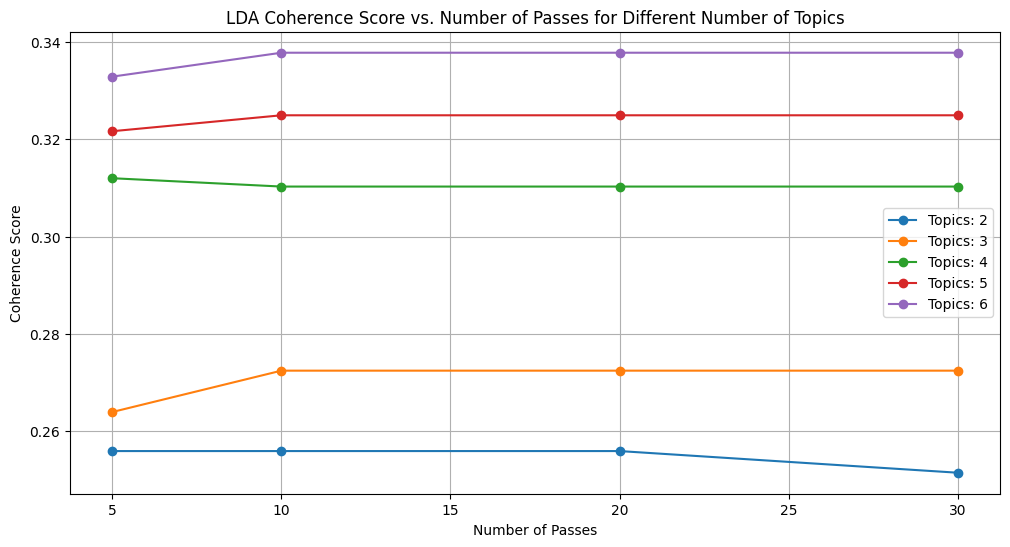

In [ ]:
from gensim.corpora import Dictionary  # Import the Dictionary class


data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj), columns=['transcript'])
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

data_nouns_adj['transcript'] = data_nouns_adj['transcript'].astype(str)
cvna = CountVectorizer(stop_words=stop_words, max_df=0.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names_out())
data_dtmna.index = data_nouns_adj.index

corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# CREATE THE GENSIM DICTIONARY HERE
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())
dictionary_na = Dictionary.from_corpus(corpusna, id2word=id2wordna)

# Parameter Tuning and Graphing
num_topics_range = range(2, 7)  # Test 2 to 6 topics
passes_range = [5, 10, 20,30]    # Test different numbers of passes

coherence_scores = {}

for n_topics in num_topics_range:
    coherence_scores[n_topics] = {}
    for n_passes in passes_range:
        lda = models.LdaModel(corpus=corpusna, num_topics=n_topics, id2word=id2wordna, passes=n_passes, random_state=42)  # Added random_state
        coherence_model_lda = CoherenceModel(model=lda, texts=[doc.split() for doc in data_nouns_adj['transcript']], dictionary=dictionary_na, coherence='c_v') # USE THE DICTIONARY OBJECT
        coherence_scores[n_topics][n_passes] = coherence_model_lda.get_coherence()
        print(f"Num Topics: {n_topics}, Passes: {n_passes}, Coherence: {coherence_scores[n_topics][n_passes]:.4f}")


# Plotting the results
plt.figure(figsize=(12, 6))
for n_topics in num_topics_range:
    plt.plot(passes_range, [coherence_scores[n_topics][n_passes] for n_passes in passes_range], marker='o', label=f'Topics: {n_topics}')

plt.xlabel('Number of Passes')
plt.ylabel('Coherence Score')
plt.title('LDA Coherence Score vs. Number of Passes for Different Number of Topics')
plt.legend()
plt.grid(True)
plt.show()

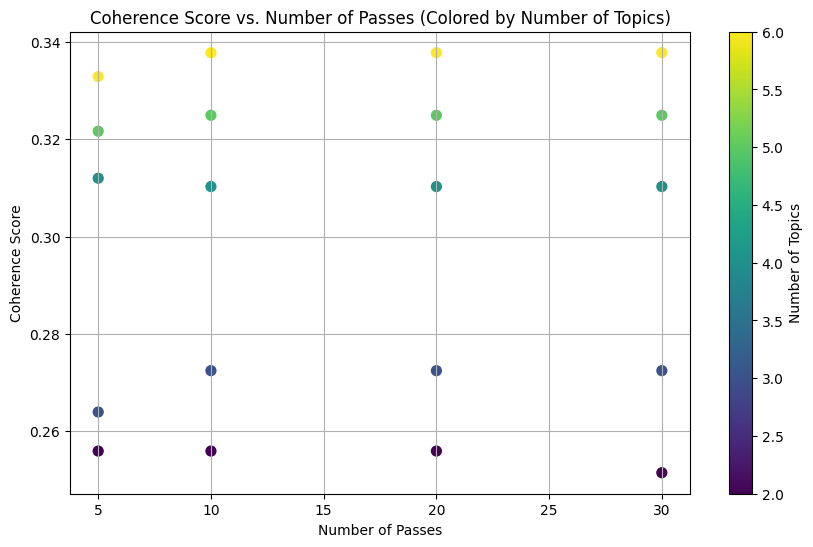

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data for scatter plot
data = []
for n_topics in coherence_scores:
    for n_passes in coherence_scores[n_topics]:
        data.append([n_topics, n_passes, coherence_scores[n_topics][n_passes]])

df = pd.DataFrame(data, columns=['num_topics', 'num_passes', 'coherence'])

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['num_passes'], df['coherence'], c=df['num_topics'], cmap='viridis', s=50)

plt.xlabel('Number of Passes')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs. Number of Passes (Colored by Number of Topics)')
plt.colorbar(scatter, label='Number of Topics')
plt.grid(True)
plt.show()


In [ ]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\armaa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


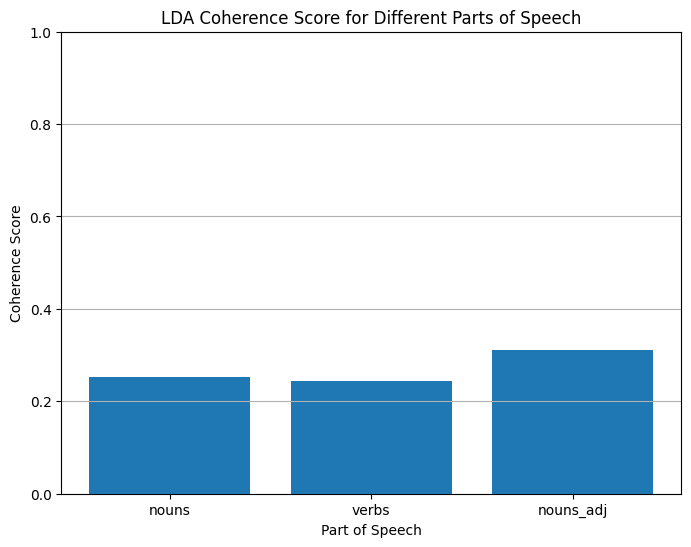

In [ ]:
# Apply the verbs function
data_verbs = pd.DataFrame(data_clean.transcript.apply(verbs), columns=['transcript'])
data_verbs['transcript'] = data_verbs['transcript'].astype(str)

cvv = CountVectorizer(stop_words=stop_words, max_df=0.8)
data_cvv = cvv.fit_transform(data_verbs.transcript)
data_dtmv = pd.DataFrame(data_cvv.toarray(), columns=cvv.get_feature_names_out())
data_dtmv.index = data_verbs.index

corpusv = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmv.transpose()))

# Create the Gensim dictionary for verbs
id2wordv = dict((v, k) for k, v in cvv.vocabulary_.items())
dictionary_v = Dictionary.from_corpus(corpusv, id2word=id2wordv)

# Nouns Only
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns), columns=['transcript'])
data_nouns['transcript'] = data_nouns['transcript'].astype(str)

# Create document-term matrix
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names_out())
data_dtmn.index = data_nouns.index

corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the Gensim dictionary for nouns
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())
dictionary_n = Dictionary.from_corpus(corpusn, id2word=id2wordn)

# Calculate Coherence Scores for Different POS
pos_tags = ['nouns', 'verbs', 'nouns_adj']
coherence_scores_pos = {}

# Nouns
lda_nouns = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=20, random_state=42)
coherence_model_nouns = CoherenceModel(model=lda_nouns, texts=[doc.split() for doc in data_nouns['transcript']], dictionary=dictionary_n, coherence='c_v') # USE THE DICTIONARY OBJECT
coherence_scores_pos['nouns'] = coherence_model_nouns.get_coherence()

# Verbs
lda_verbs = models.LdaModel(corpus=corpusv, num_topics=4, id2word=id2wordv, passes=20, random_state=42)
coherence_model_verbs = CoherenceModel(model=lda_verbs, texts=[doc.split() for doc in data_verbs['transcript']], dictionary=dictionary_v, coherence='c_v') # USE THE DICTIONARY OBJECT
coherence_scores_pos['verbs'] = coherence_model_verbs.get_coherence()

# Nouns and Adjectives
lda_nouns_adj = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=20, random_state=42)
coherence_model_nouns_adj = CoherenceModel(model=lda_nouns_adj, texts=[doc.split() for doc in data_nouns_adj['transcript']], dictionary=dictionary_na, coherence='c_v') # USE THE DICTIONARY OBJECT
coherence_scores_pos['nouns_adj'] = coherence_model_nouns_adj.get_coherence()

# Plotting Coherence Scores for Different POS
plt.figure(figsize=(8, 6))
plt.bar(pos_tags, [coherence_scores_pos[pos] for pos in pos_tags])
plt.xlabel('Part of Speech')
plt.ylabel('Coherence Score')
plt.title('LDA Coherence Score for Different Parts of Speech')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()